<a href="https://colab.research.google.com/github/nastyaivt/MO/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'uci_id': 54, 'name': 'ISOLET', 'repository_url': 'https://archive.ics.uci.edu/dataset/54/isolet', 'data_url': 'https://archive.ics.uci.edu/static/public/54/data.csv', 'abstract': ' Goal: Predict which letter-name was spoken--a simple classification task.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 7797, 'num_features': 617, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C51G69', 'creators': ['Ron Cole', 'Mark Fanty'], 'intro_paper': {'ID': 394, 'type': 'NATIVE', 'title': 'Spoken letter recognition', 'authors': 'Fanty, M., Cole, R.', 'venue': 'Advances in Neural Information Processing Systems 3', 'year': 1991, 'journal': None, 'DOI': None, 'URL': None, 'sha': None, 'corpus': None, 'arxiv': None, 'mag': None, 'acl': None, 'p

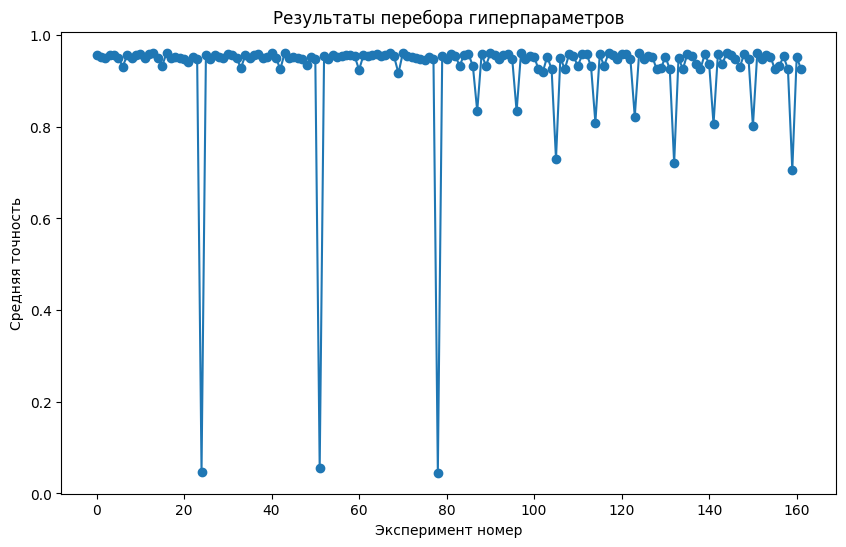

In [4]:
# Установка зависимости
!pip install ucimlrepo

# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
isolet = fetch_ucirepo(id=54)  # ISOLET dataset ID

# data (as pandas dataframes)
X = isolet.data.features
y = isolet.data.targets

# metadata
print(isolet.metadata)

# variable information
print(isolet.variables)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Преобразование в массив
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение моделей
# Перцептрон
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)
y_pred_perceptron = perceptron.predict(X_test_scaled)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# MLPClassifier с базовыми параметрами
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Точность Perceptron: {accuracy_perceptron:.4f}")
print(f"Точность MLPClassifier: {accuracy_mlp:.4f}")

# Эксперименты по подбору гиперпараметров для MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42),
                           param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на валидационной выборке:", grid_search.best_score_)

# 5. Визуализация результатов
results = pd.DataFrame(grid_search.cv_results_)
scores_mean = results['mean_test_score']
params = results['params']

plt.figure(figsize=(10, 6))
plt.plot(scores_mean, marker='o')
plt.xlabel('Эксперимент номер')
plt.ylabel('Средняя точность')
plt.title('Результаты перебора гиперпараметров')

plt.show()